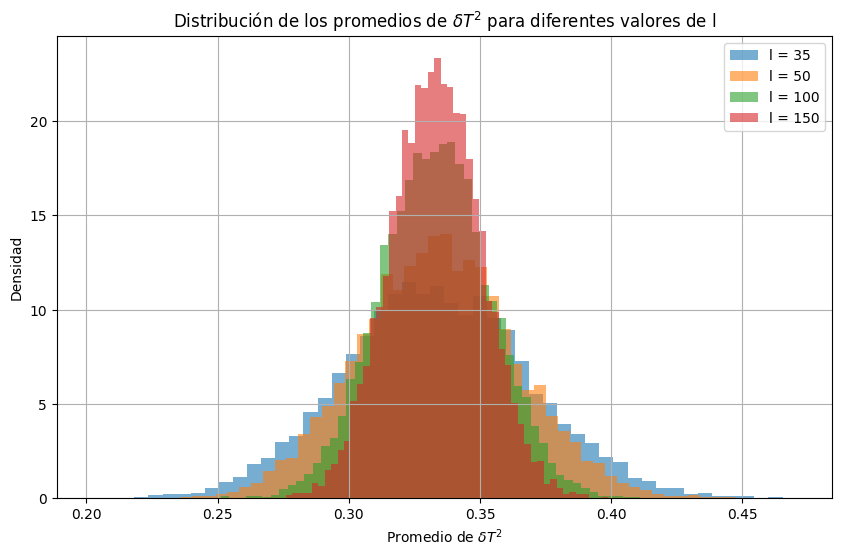

In [8]:
# por el teorema de grandes numeros sabemos que si l aumenta también lo hará m. Del problema sabemos que para cada par (l,m), dt resulta en una distribucion gaussiana
#cuando tomamos valores altos l>30 tenemos suficientees valores de m que permite calcular el promedio de dt^2 (fluctuaciones) una vez aplicamos el teorema central del limite.
#entonces primero aseguramos el promedio de muchas fluctuaciones y luego ese promedio de fluctuaciones tiende a ser una distribución gaussiana


import numpy as np
import matplotlib.pyplot as plt

# Parámetros
np.random.seed(0)  # Para reproducibilidad
valores_l = [35, 50, 100, 150]  # Valores de l>30
num_simulaciones = 10000  # Número de simulaciones para l

# simular delta T^2 para un valor de l
def simulate_delta_T2(l, num_simulaciones):
    m = 2 * l + 1  # Número de m para cada l
    delta_T2_means = [] #media de los cuadrados
    
    for _ in range(num_simulaciones):
        # Simulación con distribución uniforme entre [-1, 1]
        delta_T = np.random.uniform(-1, 1, m)
        # Promedio de fluctuciones para los valores de m
        delta_T2_mean = np.mean(delta_T**2)
        delta_T2_means.append(delta_T2_mean)
    
    return np.array(delta_T2_means)

# Graficar los resultados de la simulación para varios l
plt.figure(figsize=(10, 6))

for l in valores_l:
    delta_T2_means = simulate_delta_T2(l, num_simulaciones)
    plt.hist(delta_T2_means, bins=50, alpha=0.6, label=f'l = {l}', density=True)
plt.title(r"Distribución de los promedios de $\delta T^2$ para diferentes valores de l")
plt.xlabel(r"Promedio de $\delta T^2$")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()